In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

from mi_modulo import *

In [2]:
ensayo3_excel = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas_csv = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery\MI_coordinates.csv"

# Leemos archivo xlsx de ensayo con 109 sujetos 
ensayo3_dict = pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0)
ensayo4_dict = pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0)

In [3]:
# Creamos una lista de matrices de conectividad por sujeto
ensayos3_dfs = lista_dfs(ensayo3_dict)
ensayos4_dfs = lista_dfs(ensayo4_dict)

In [4]:
# Creamos una matriz de conectividad a partir de la lista de 109 sujetos
resultado3_df = capsula(ensayos3_dfs, 0.5, 0.6)
resultado4_df = capsula(ensayos4_dfs, 0.4, 0.7)

# Generar estadísticos para decidir umbrales 

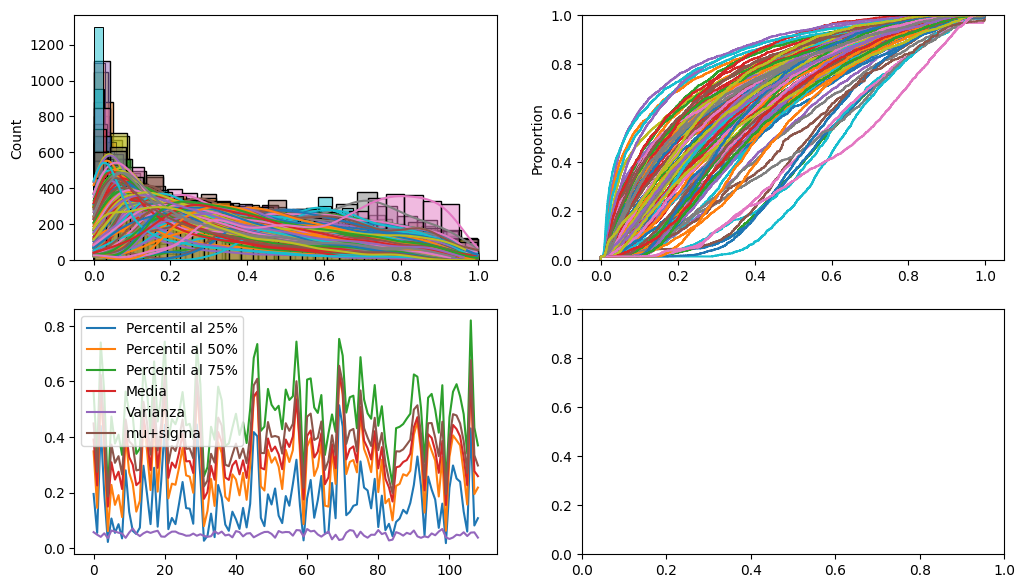

In [5]:
# Análisis para ensayo3
ensayos_dfs = ensayos3_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))
    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th75, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()


In [6]:
from scipy import stats

In [7]:
estadisticos_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
                               index=['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th25, th50, th75, promedio, mu_sigma]

min_, max_, mediana_, cosa_ = [], [], [], []
for columna in columnas:
    d1, d2, d3, d4 = np.min(columna), np.max(columna), np.median(columna), stats.median_abs_deviation(columna)
    min_.append(d1)
    max_.append(d2)
    mediana_.append(d3)
    cosa_.append(d4)
estadisticos_df.loc['min'] = min_
estadisticos_df.loc['max'] = max_
estadisticos_df.loc['mediana'] = mediana_
estadisticos_df.loc['cosa_rara'] = cosa_

In [8]:
# test_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
#                                index=['min', 'max', 'mediana', 'cosa_rara'])
# estadisticos_ = [th25, th50, th75, promedio, mu_sigma]

# for idx, columna in enumerate(test_df.columns):
#     test_df[columna] = [np.min(estadisticos_[idx]), np.min(estadisticos_[idx]), 
#                         np.median(min(estadisticos_[idx])), stats.median_abs_deviation(estadisticos_[idx])]
# test_df

Text(0.5, 0.98, 'Análisis para valor de umbral al 60% de la población en el ensayo 3')

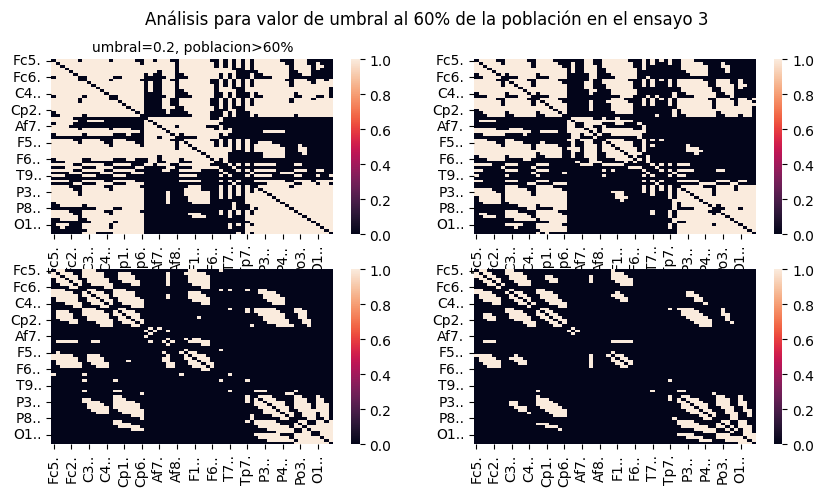

In [9]:
# Análisis para valor de umbral al 60% de la población en el ensayo 3
resultado3_df1 = capsula(ensayos3_dfs, 0.2, 0.6)
resultado3_df2 = capsula(ensayos3_dfs, 0.3, 0.6)
resultado3_df3 = capsula(ensayos3_dfs, 0.5, 0.6)
resultado3_df4 = capsula(ensayos3_dfs, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado3_df1, ax=axes[0, 0])
sns.heatmap(resultado3_df2, ax=axes[0, 1])
sns.heatmap(resultado3_df3, ax=axes[1, 0])
sns.heatmap(resultado3_df4, ax=axes[1, 1])
# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en el ensayo 3')

Text(0.5, 0.98, 'Análisis para valor de umbral al 60% de la población en el ensayo 4')

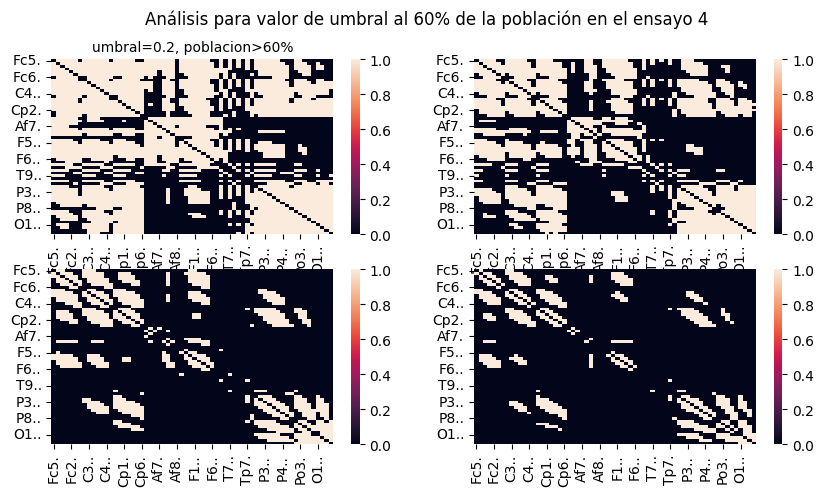

In [10]:
resultado4_df1 = capsula(ensayos4_dfs, 0.2, 0.6)
resultado4_df2 = capsula(ensayos4_dfs, 0.3, 0.6)
resultado4_df3 = capsula(ensayos4_dfs, 0.5, 0.6)
resultado4_df4 = capsula(ensayos4_dfs, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado4_df1, ax=axes[0, 0])
sns.heatmap(resultado4_df2, ax=axes[0, 1])
sns.heatmap(resultado4_df3, ax=axes[1, 0])
sns.heatmap(resultado4_df4, ax=axes[1, 1])
# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en el ensayo 4')

# Generación de resultados

Después del análisis realizado, utilizando los mapas de calor, **para escoger un threshold** adecuado **y un porcentaje** de la población que cumpla dicho umbral; se procederá a generar los resultados.

Resultados a generar:
- Grafo2D
- Grafo3D
- Métricas de grafo
- Gráfico de comunidades con Hub

In [11]:
# Convertir de dataframe a grafo
ensayo3_grafo_ = nx.from_pandas_adjacency(resultado3_df3)
ensayo4_grafo_ = nx.from_pandas_adjacency(resultado4_df1)

In [12]:
# Cálculo de métricas por ensayo
(clust_coeff_3, path_length_3, small_world_sigma_3, communities_3, 
 modularity_3, betwenness_3, global_eff_3, local_eff_3, degree_dict_3) = metricas_grafo(ensayo3_grafo_)

(clust_coeff_4, path_length_4, small_world_sigma_4, communities_4, 
 modularity_4, betwenness_4, global_eff_4, local_eff_4, degree_dict_4) = metricas_grafo(ensayo4_grafo_)

In [13]:
# Construcción de dataframe de coordenadas
eeg_coords = pd.read_csv(coordenadas_csv)
eeg_coords.set_index("canal", drop=True, inplace=True)

In [14]:
# Para esto, se necesitan instalar paquetes que no se vieron en clase, por tanto, es opcional
# %matplotlib widget

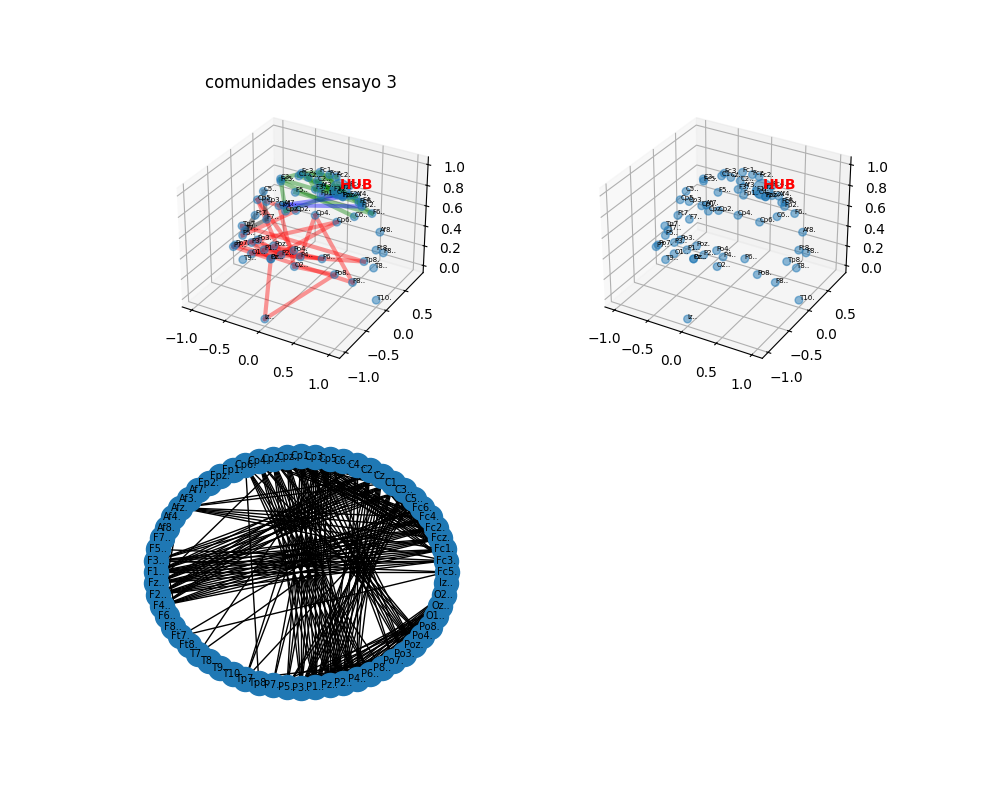

In [15]:
# Grafo de resultados para ensayo 3
hub = betwenness_3[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_3, hub, eeg_coords, axes[0])
grafo3D(eeg_coords, hub, axes[1])
ensayo_grafo = grafo2D(resultado3_df3, axes[2])

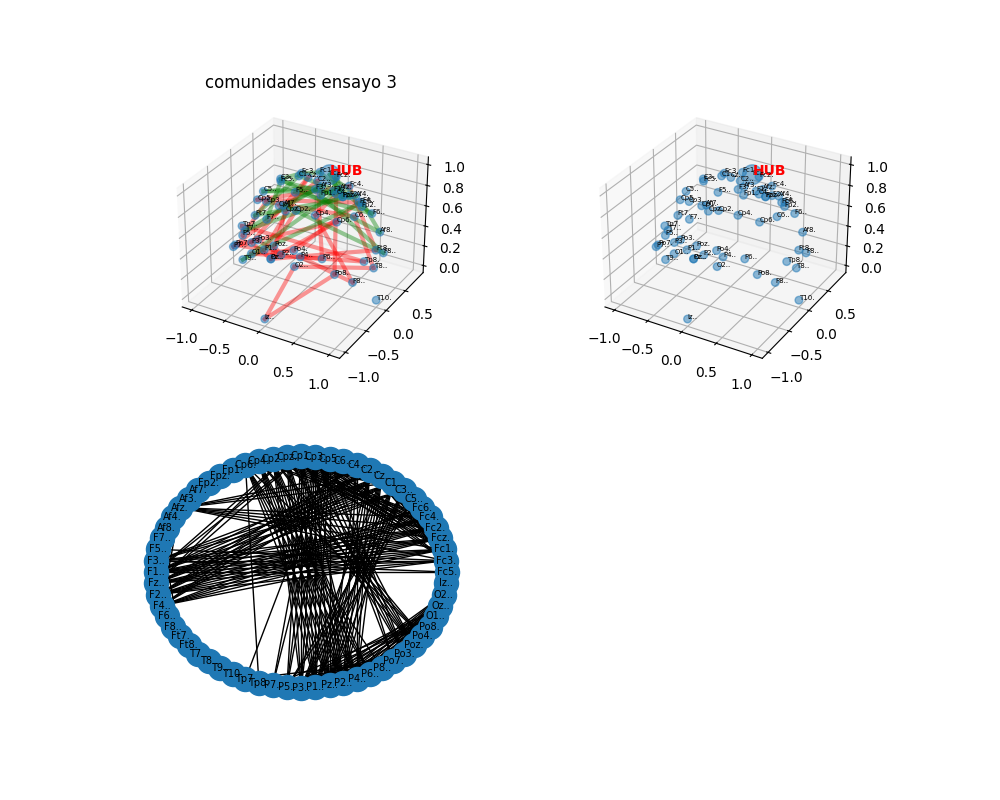

In [16]:
# Grafo de resultados para ensayo 3
hub = betwenness_4[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]

grafo_comunidades(communities_4, hub, eeg_coords, axes[0])
grafo3D(eeg_coords, hub, axes[1])
ensayo_grafo = grafo2D(resultado4_df3, axes[2])

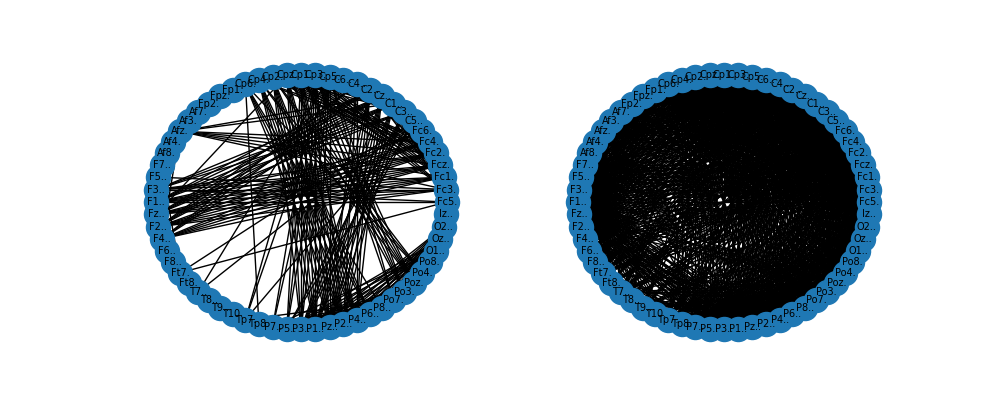

In [17]:
# Grafo2 para ensayos 3 y 4
hub3 = betwenness_3[0]
hub4 = betwenness_4[0]

fig = plt.figure(figsize=(10, 4))
axes = [fig.add_subplot(1, 2, 1), 
        fig.add_subplot(1, 2, 2)]

ensayo_grafo = grafo2D(resultado3_df3, axes[0])
ensayo_grafo = grafo2D(resultado4_df1, axes[1])

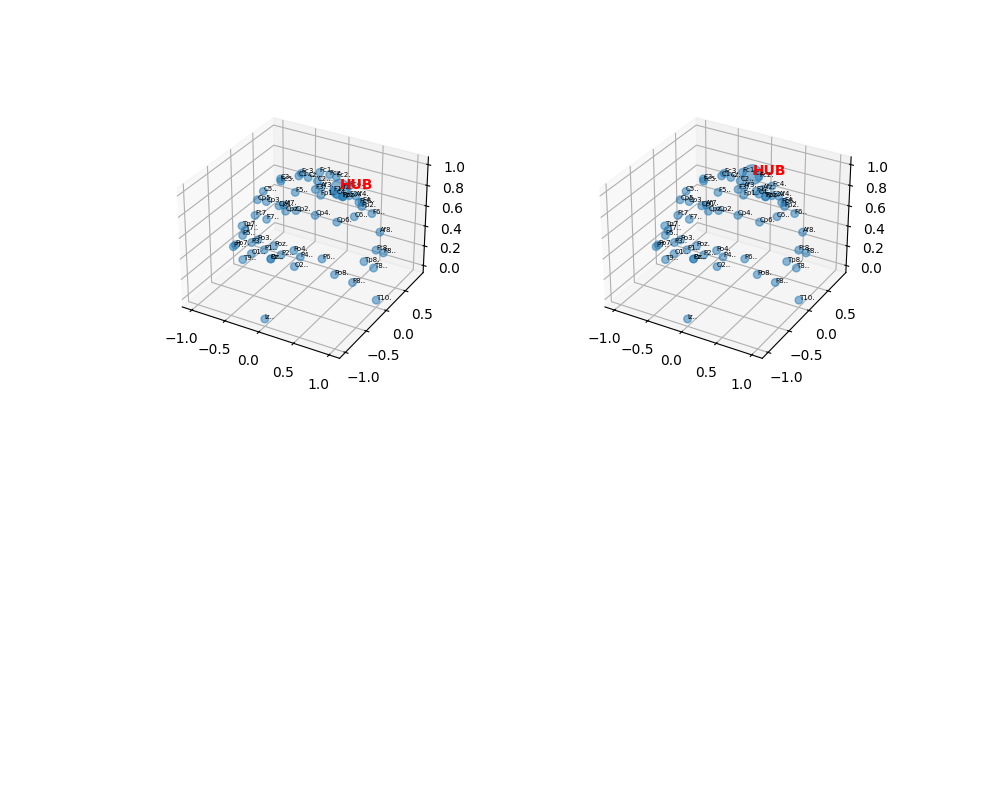

In [18]:
# Grafo3D para ensayos 3 y 4
hub3 = betwenness_3[0]
hub4 = betwenness_4[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo3D(eeg_coords, hub3, axes[0])
grafo3D(eeg_coords, hub4, axes[1])

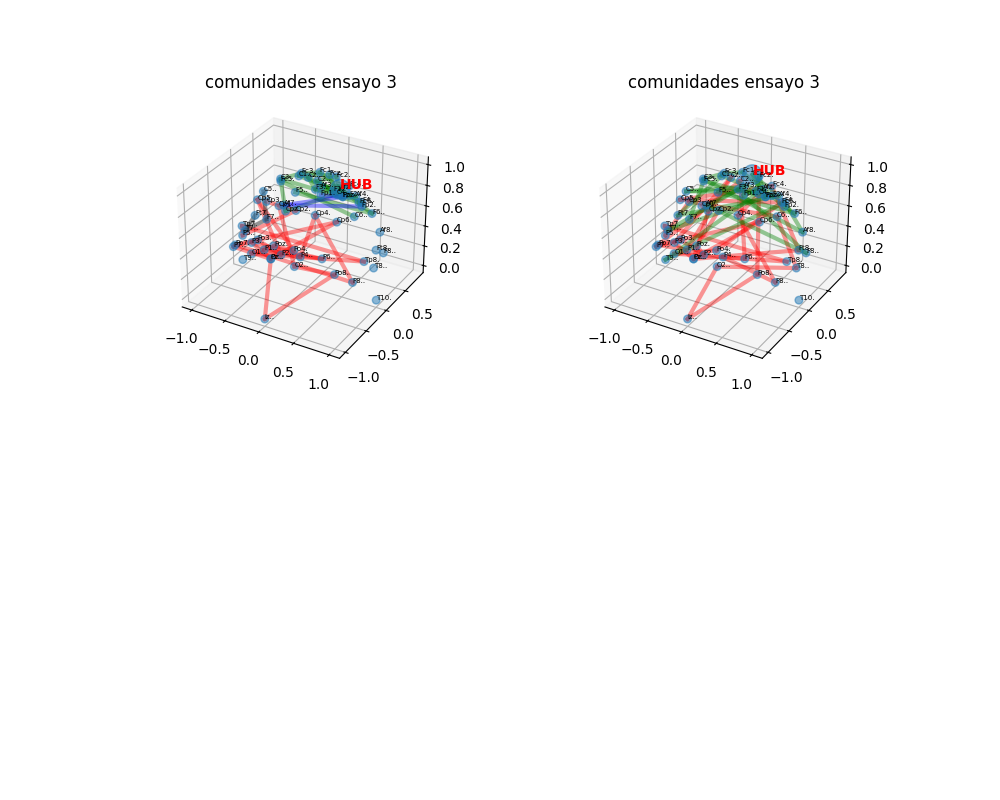

In [19]:
# Comunidades para ensayos 3 y 4
hub3 = betwenness_3[0]
hub4 = betwenness_4[0]

fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d')]

grafo_comunidades(communities_3, hub3, eeg_coords, axes[0])
grafo_comunidades(communities_4, hub4, eeg_coords, axes[1])

# 
Leer datos
generar lista de dataframes
compactar a 1 dataframe
    hacer análisis sobre umbrales por ensayo
analizamos resultado con mapa de calor
observamos resultado en grafo 2D
observamos resultado en grafo 3D

Conocimiento previo, expertice
Análisis de literatura
Lógica

